In [377]:
import pandas as pd
rankeds = pd.read_csv('high_diamond_ranked_10min.csv')

In [378]:
toDrop = []

for team in ['blue', 'red']:
    for case in ['WardsDestroyed', 'GoldDiff', 'ExperienceDiff', 'CSPerMin', 'GoldPerMin', 'AvgLevel', 'TotalExperience', 'EliteMonsters', 'TotalJungleMinionsKilled', 'FirstBlood', 'Heralds', 'TowersDestroyed', 'Dragons']:
        toDrop.append(team + case)
        
rankeds.drop(['gameId'] + toDrop,  axis=1, inplace=True)

for column in rankeds.columns:
    if 'red' in column:
        rankeds.drop(column,  axis=1, inplace=True)


### Wstępna analiza danych

In [379]:
rankeds.columns

Index(['blueWins', 'blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueTotalGold', 'blueTotalMinionsKilled'],
      dtype='object')

In [380]:
rankeds.head(10)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,0,28,9,6,11,17210,195
1,0,12,5,5,5,14712,174
2,0,15,7,11,4,16113,186
3,0,43,4,5,5,15157,201
4,0,75,6,6,6,16400,210
5,1,18,5,3,6,15899,225
6,1,18,7,6,7,16874,225
7,0,16,5,13,3,15305,209
8,0,16,7,7,8,16401,189
9,1,13,4,5,5,15057,220


In [381]:
rankeds.describe()

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,6.183925,6.137666,6.645106,16503.455512,216.699565
std,0.500024,18.019177,3.011028,2.933818,4.064520,1535.446636,21.858437
min,0.000000,5.000000,0.000000,0.000000,0.000000,10730.000000,90.000000
25%,0.000000,14.000000,4.000000,4.000000,4.000000,15415.500000,202.000000
50%,0.000000,16.000000,6.000000,6.000000,6.000000,16398.000000,218.000000
75%,1.000000,20.000000,8.000000,8.000000,9.000000,17459.000000,232.000000
max,1.000000,250.000000,22.000000,22.000000,29.000000,23701.000000,283.000000


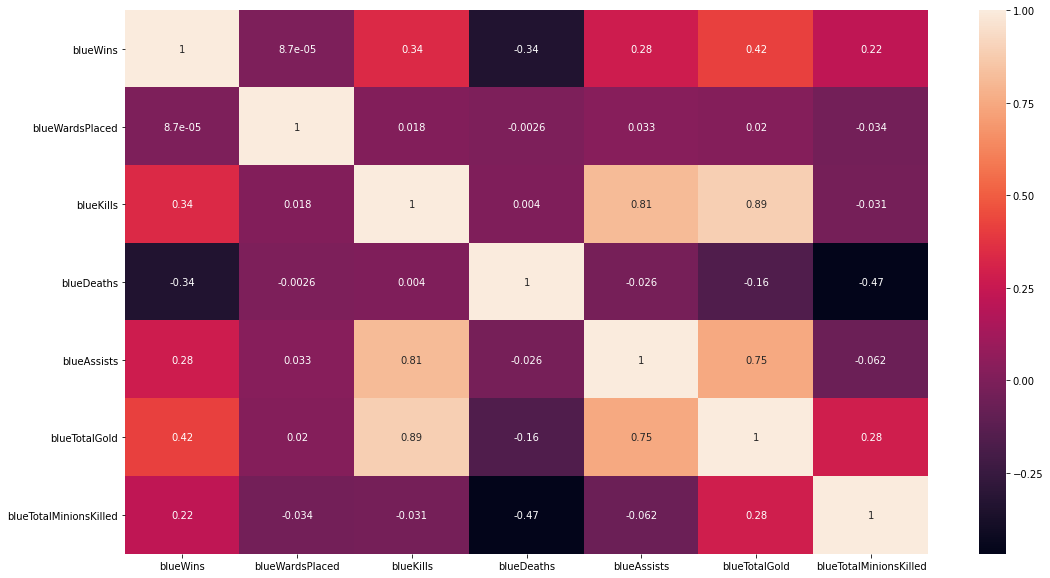

In [382]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 10))

corr = rankeds.corr()
sns.heatmap(corr,
xticklabels=corr.columns.values,
yticklabels=corr.columns.values, annot=True )


### Wykresy zależności

Text(0.5, 1.0, 'Zależność posiadanego złota od zabójstw')

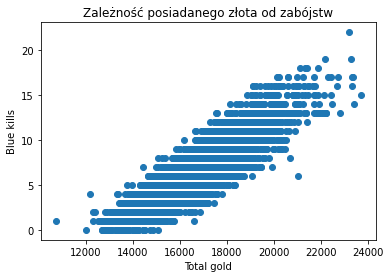

In [383]:
plt.scatter(rankeds['blueTotalGold'], rankeds['blueKills'])
plt.xlabel('Total gold')
plt.ylabel('Blue kills')
plt.title('Zależność posiadanego złota od zabójstw')

Text(0.5, 1.0, 'Zależność złota od śmierci')

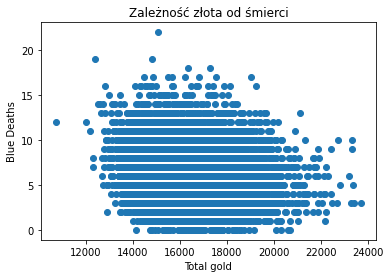

In [384]:
plt.scatter(rankeds['blueTotalGold'], rankeds['blueDeaths'])
plt.xlabel('Total gold')
plt.ylabel('Blue Deaths')
plt.title('Zależność złota od śmierci')

Text(0.5, 1.0, 'Zależność zabójstw od stawiania wardów')

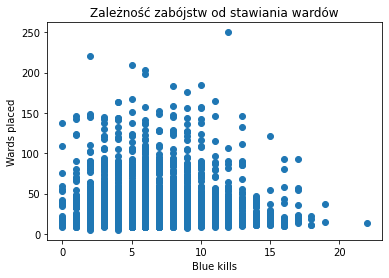

In [385]:
plt.scatter(rankeds['blueKills'], rankeds['blueWardsPlaced'])
plt.xlabel('Blue kills')
plt.ylabel('Wards placed')
plt.title('Zależność zabójstw od stawiania wardów')

### Histogramy

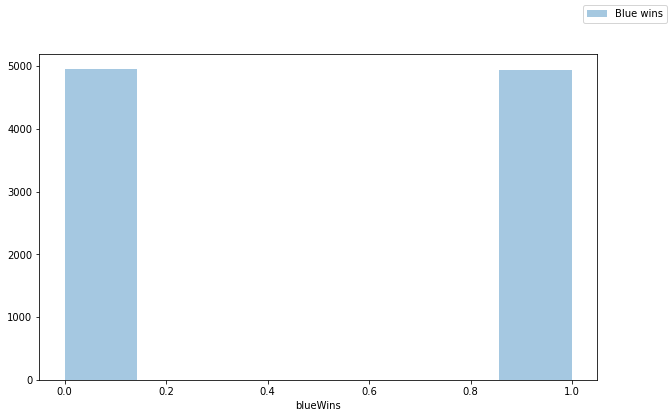

In [386]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueWins'], label='Blue wins', bins=7,  kde=False)
fig.legend(labels=['Blue wins'])

plt.show()

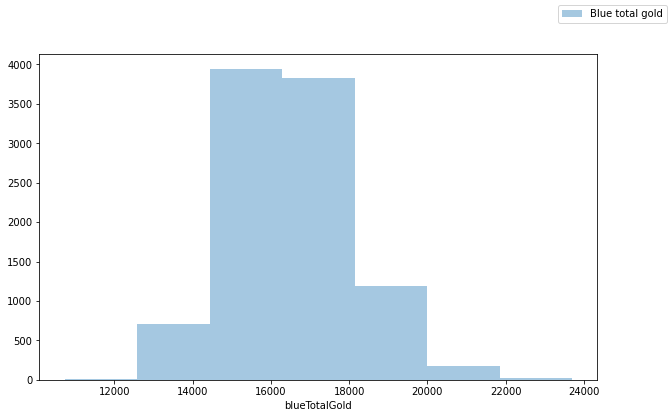

In [387]:

fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueTotalGold'], label='Blue total gold', bins=7,  kde=False)
fig.legend(labels=['Blue total gold'])

plt.show()


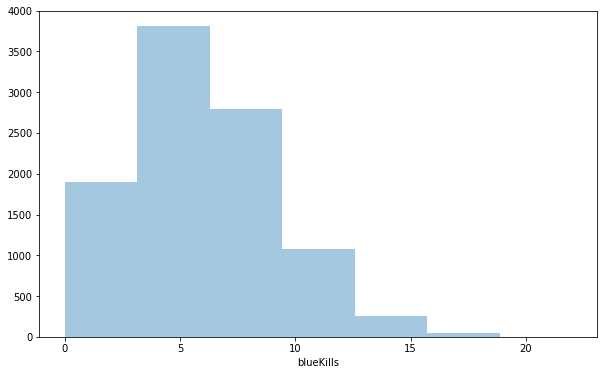

In [388]:
fig = plt.figure(figsize=(10,6))
sns.distplot(rankeds['blueKills'], label='Blue kills', bins=7,  kde=False)

plt.show()

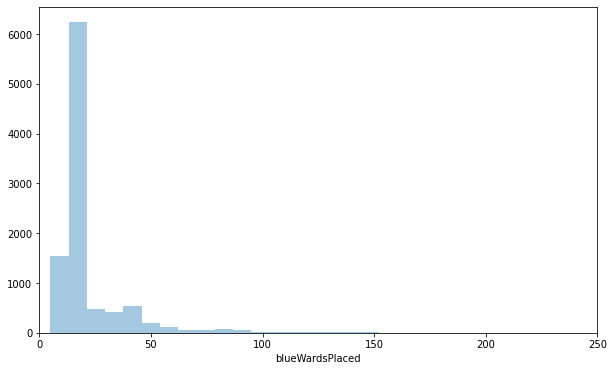

In [389]:
fig = plt.figure(figsize=(10,6))
plt.xlim(0, rankeds['blueWardsPlaced'].max())
sns.distplot(rankeds['blueWardsPlaced'], label='Blue kills', bins=30,  kde=False)

plt.show()

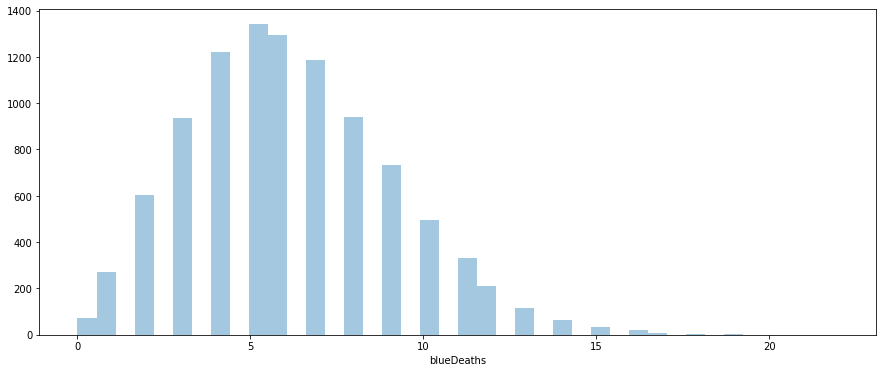

In [390]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueDeaths'], label='Blue deaths', bins=40,  kde=False)

plt.show()

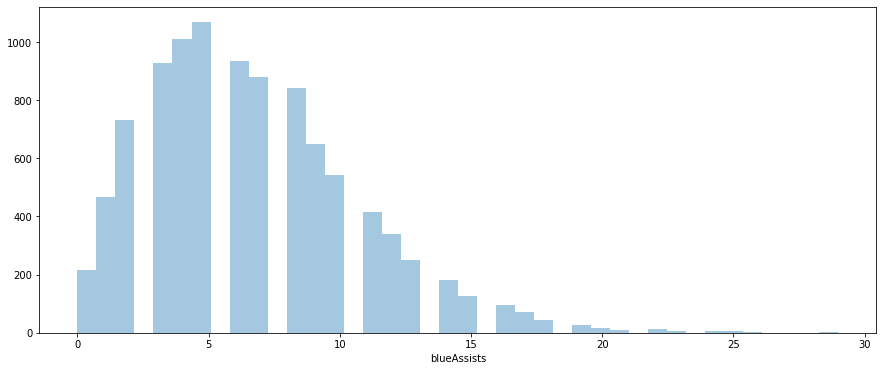

In [391]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueAssists'], label='Blue assissts', bins=40,  kde=False)

plt.show()

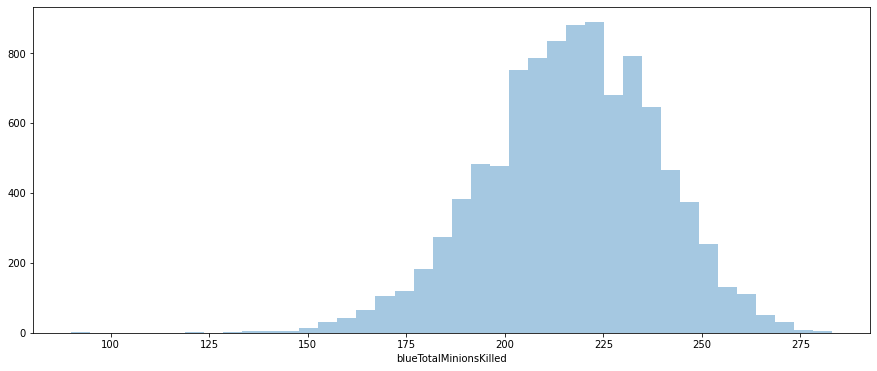

In [392]:

fig = plt.figure(figsize=(15,6))
sns.distplot(rankeds['blueTotalMinionsKilled'], label='Blue assissts', bins=40,  kde=False)

plt.show()

### Odległość euklidesowa


In [393]:
# funkcja pomocnicza
def euclidean_distance(row1, row2):
    return np.linalg.norm(row1 - row2)

In [394]:
euclidean_distance(rankeds.loc[0], rankeds.loc[1])

2498.150115585531

In [395]:
print(rankeds.loc[0])
print(rankeds.loc[1])

blueWins                      0
blueWardsPlaced              28
blueKills                     9
blueDeaths                    6
blueAssists                  11
blueTotalGold             17210
blueTotalMinionsKilled      195
Name: 0, dtype: int64
blueWins                      0
blueWardsPlaced              12
blueKills                     5
blueDeaths                    5
blueAssists                   5
blueTotalGold             14712
blueTotalMinionsKilled      174
Name: 1, dtype: int64


### Standaryzacja danych za pomocą StandardScaler

In [396]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rankeds_standarized = pd.DataFrame(scaler.fit_transform(rankeds), columns = rankeds.columns)
rankeds_standarized.head()

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,-0.998079,0.316996,0.935301,-0.046926,1.071495,0.460179,-0.992782
1,-0.998079,-0.570992,-0.393216,-0.387796,-0.404768,-1.166792,-1.953558
2,-0.998079,-0.404494,0.271042,1.657424,-0.650812,-0.254307,-1.404543
3,-0.998079,1.149484,-0.725346,-0.387796,-0.404768,-0.876959,-0.718275
4,-0.998079,2.925460,-0.061087,-0.046926,-0.158724,-0.067382,-0.306513


In [397]:
scaler.mean_

array([4.99038364e-01, 2.22882883e+01, 6.18392550e+00, 6.13766576e+00,
       6.64510578e+00, 1.65034555e+04, 2.16699565e+02])

In [398]:
scaler.scale_

array([4.99999075e-01, 1.80182645e+01, 3.01087558e+00, 2.93366922e+00,
       4.06431418e+00, 1.53536892e+03, 2.18573310e+01])

In [399]:
#po standaryzacji
euclidean_distance(rankeds_standarized.loc[0], rankeds_standarized.loc[1])

2.9015773985348603

In [400]:
print(rankeds_standarized.loc[0], rankeds_standarized.loc[1])

blueWins                 -0.998079
blueWardsPlaced           0.316996
blueKills                 0.935301
blueDeaths               -0.046926
blueAssists               1.071495
blueTotalGold             0.460179
blueTotalMinionsKilled   -0.992782
Name: 0, dtype: float64 blueWins                 -0.998079
blueWardsPlaced          -0.570992
blueKills                -0.393216
blueDeaths               -0.387796
blueAssists              -0.404768
blueTotalGold            -1.166792
blueTotalMinionsKilled   -1.953558
Name: 1, dtype: float64


### Klastrowanie metodą k-średnich n = 2

In [401]:
from sklearn.cluster import KMeans

In [402]:
k2 = KMeans(n_clusters=2)
k2.fit(rankeds_standarized)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

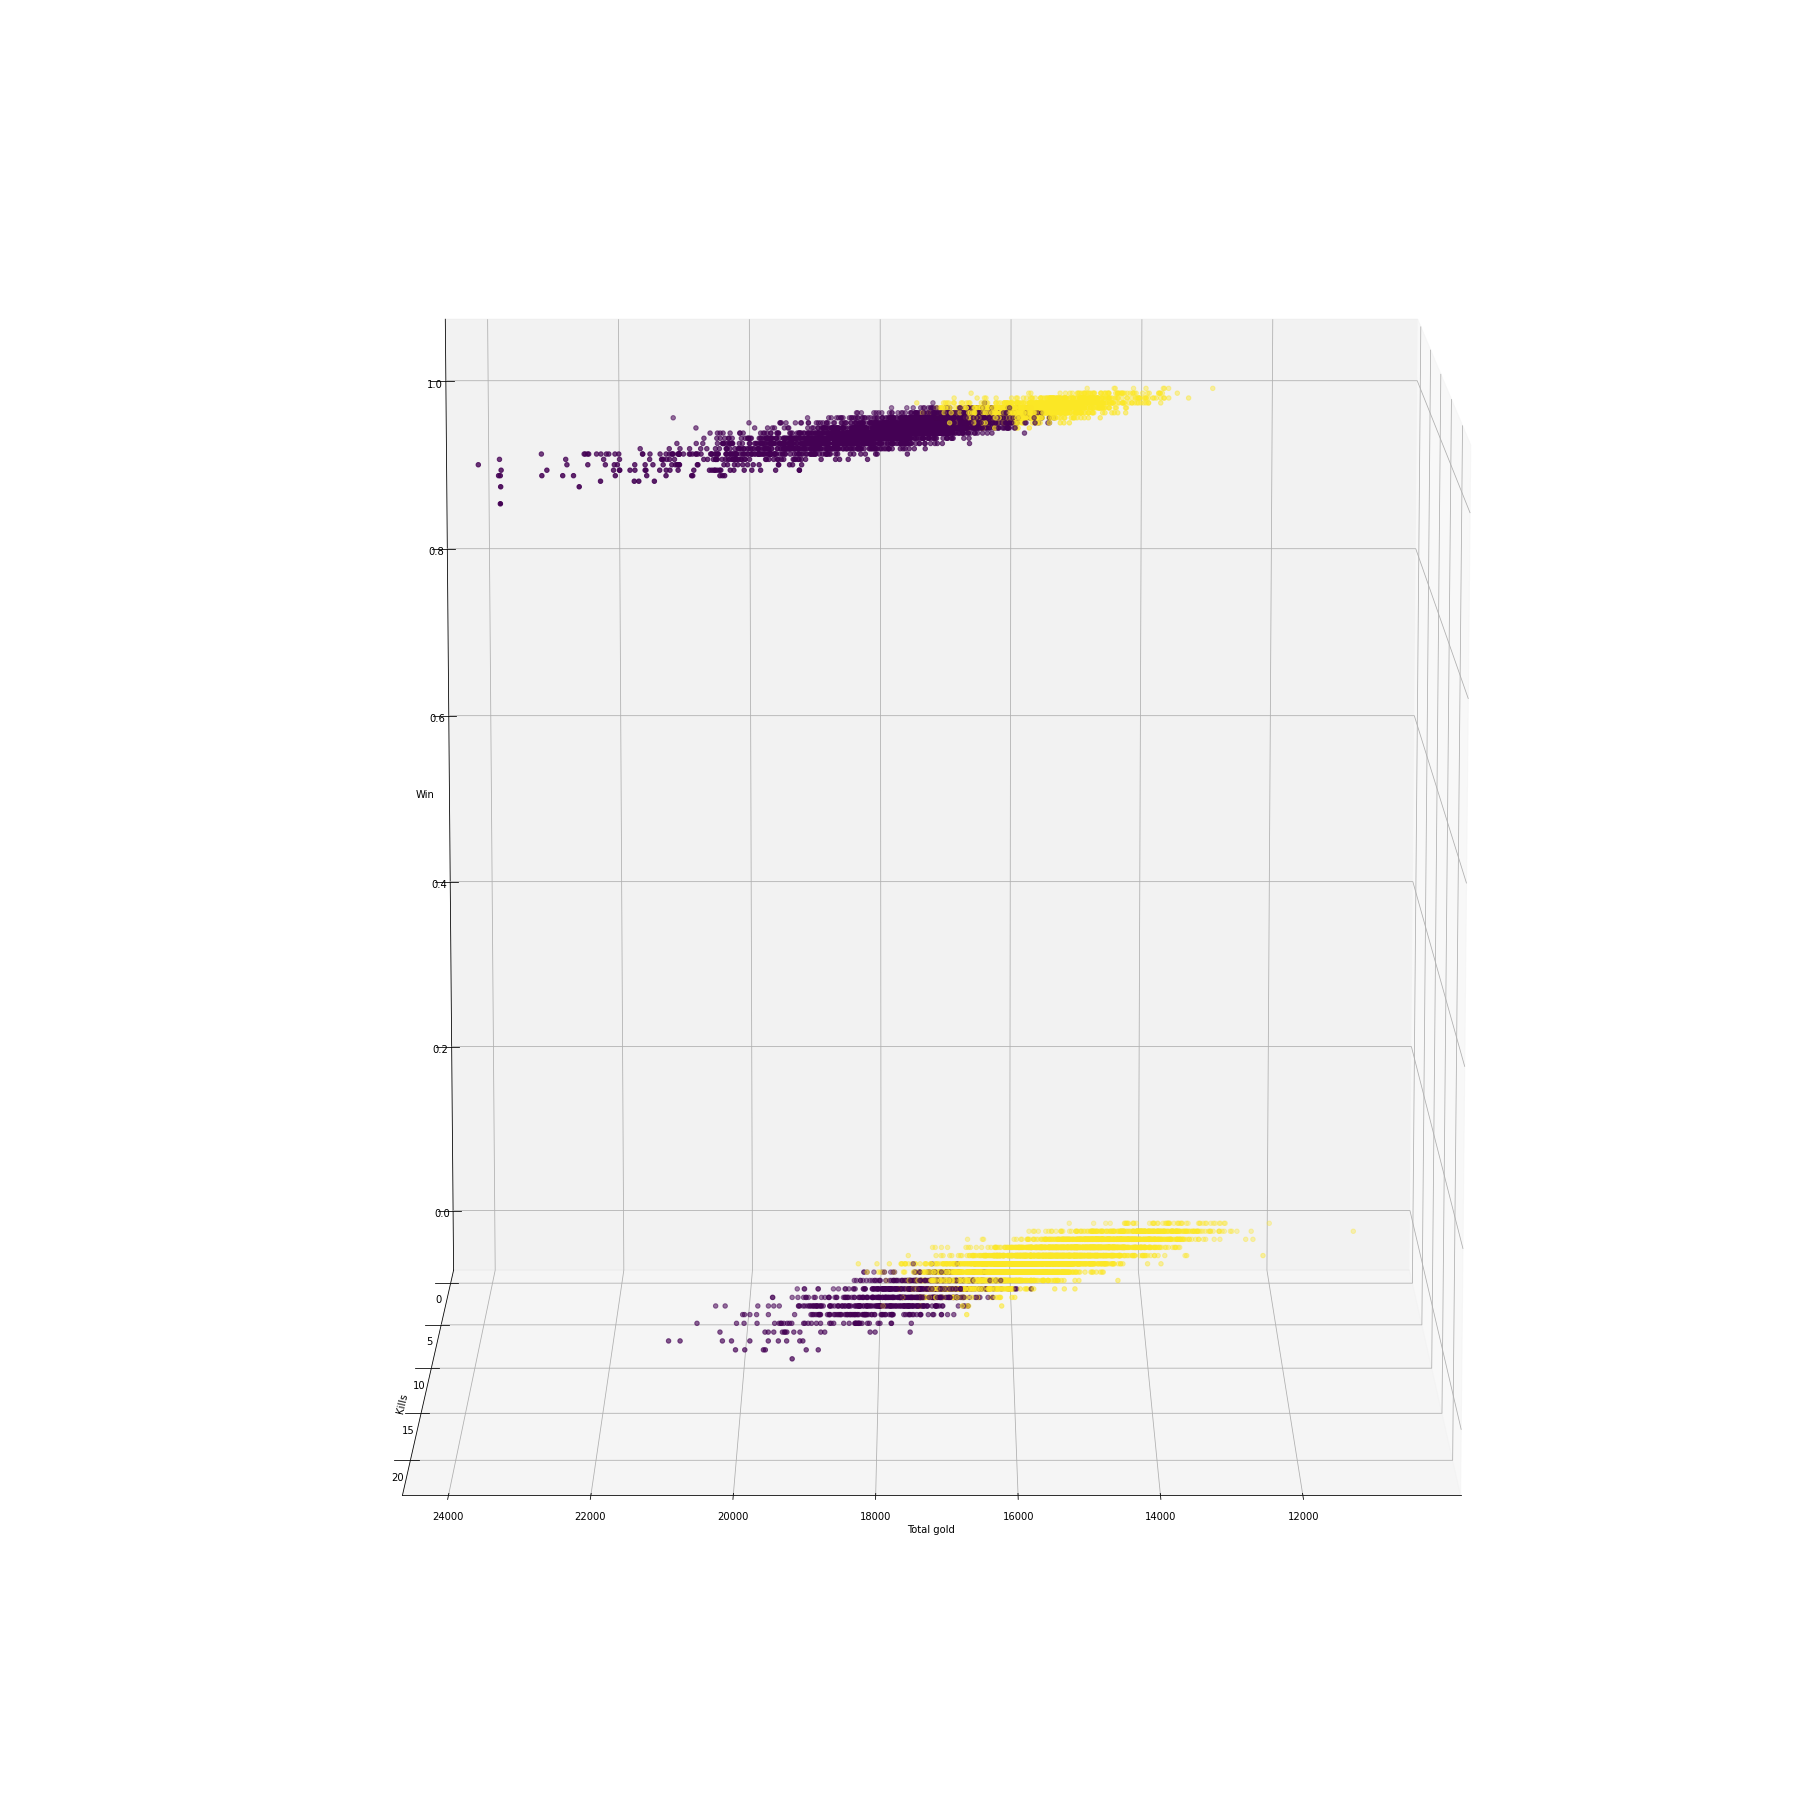

In [403]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=k2.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

### Analiza modeli k-means dla zakresu n = (2,15)


In [404]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

k_clusters = []
inertia = []
silhouette = []
calinski = []

for k in range(2,15):
    km = KMeans(n_clusters = k)
    km.fit(rankeds_standarized)
    
    k_clusters.append(k)
    silhouette.append(silhouette_score(rankeds_standarized, km.labels_))
    calinski.append(calinski_harabasz_score(rankeds_standarized, km.labels_))
    inertia.append(km.inertia_)
    


Text(0, 0.5, 'Silhouette coefficient')

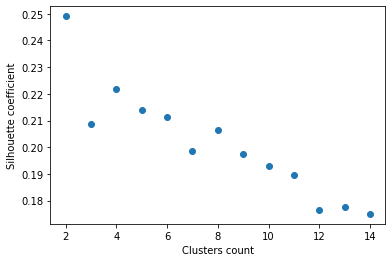

In [405]:
plt.scatter(k_clusters, silhouette)
plt.xlabel('Clusters count')
plt.ylabel('Silhouette coefficient')


Text(0, 0.5, 'Calinski-Harabasz score')

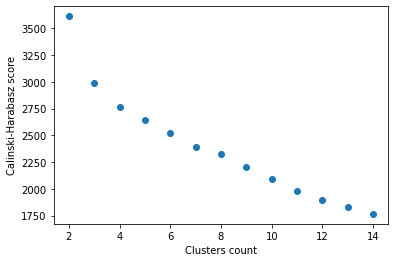

In [406]:
plt.scatter(k_clusters, calinski)
plt.xlabel('Clusters count')
plt.ylabel('Calinski-Harabasz score')

Text(0, 0.5, 'Inertia')

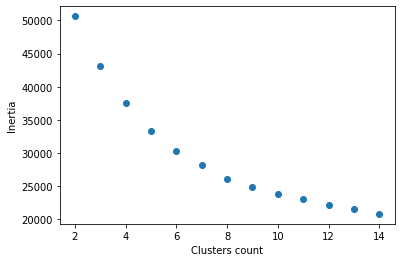

In [407]:
plt.scatter(k_clusters, inertia)
plt.xlabel('Clusters count')
plt.ylabel('Inertia')

In [408]:
km = KMeans(n_clusters=5)
km.fit(rankeds_standarized)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [409]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=rankeds_standarized.columns)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,0.999620,19.715101,5.239254,4.435146,5.211107,16320.128566,226.669836
1,0.000799,19.335198,4.021175,5.525769,4.113464,15577.217739,223.629644
2,0.802370,19.861193,10.012273,5.677952,11.601777,18393.816335,218.642404
3,0.120079,19.269193,5.589075,9.584154,5.840059,15661.159941,193.459154
4,0.454545,96.227273,6.352273,6.394886,6.730114,16631.187500,214.073864


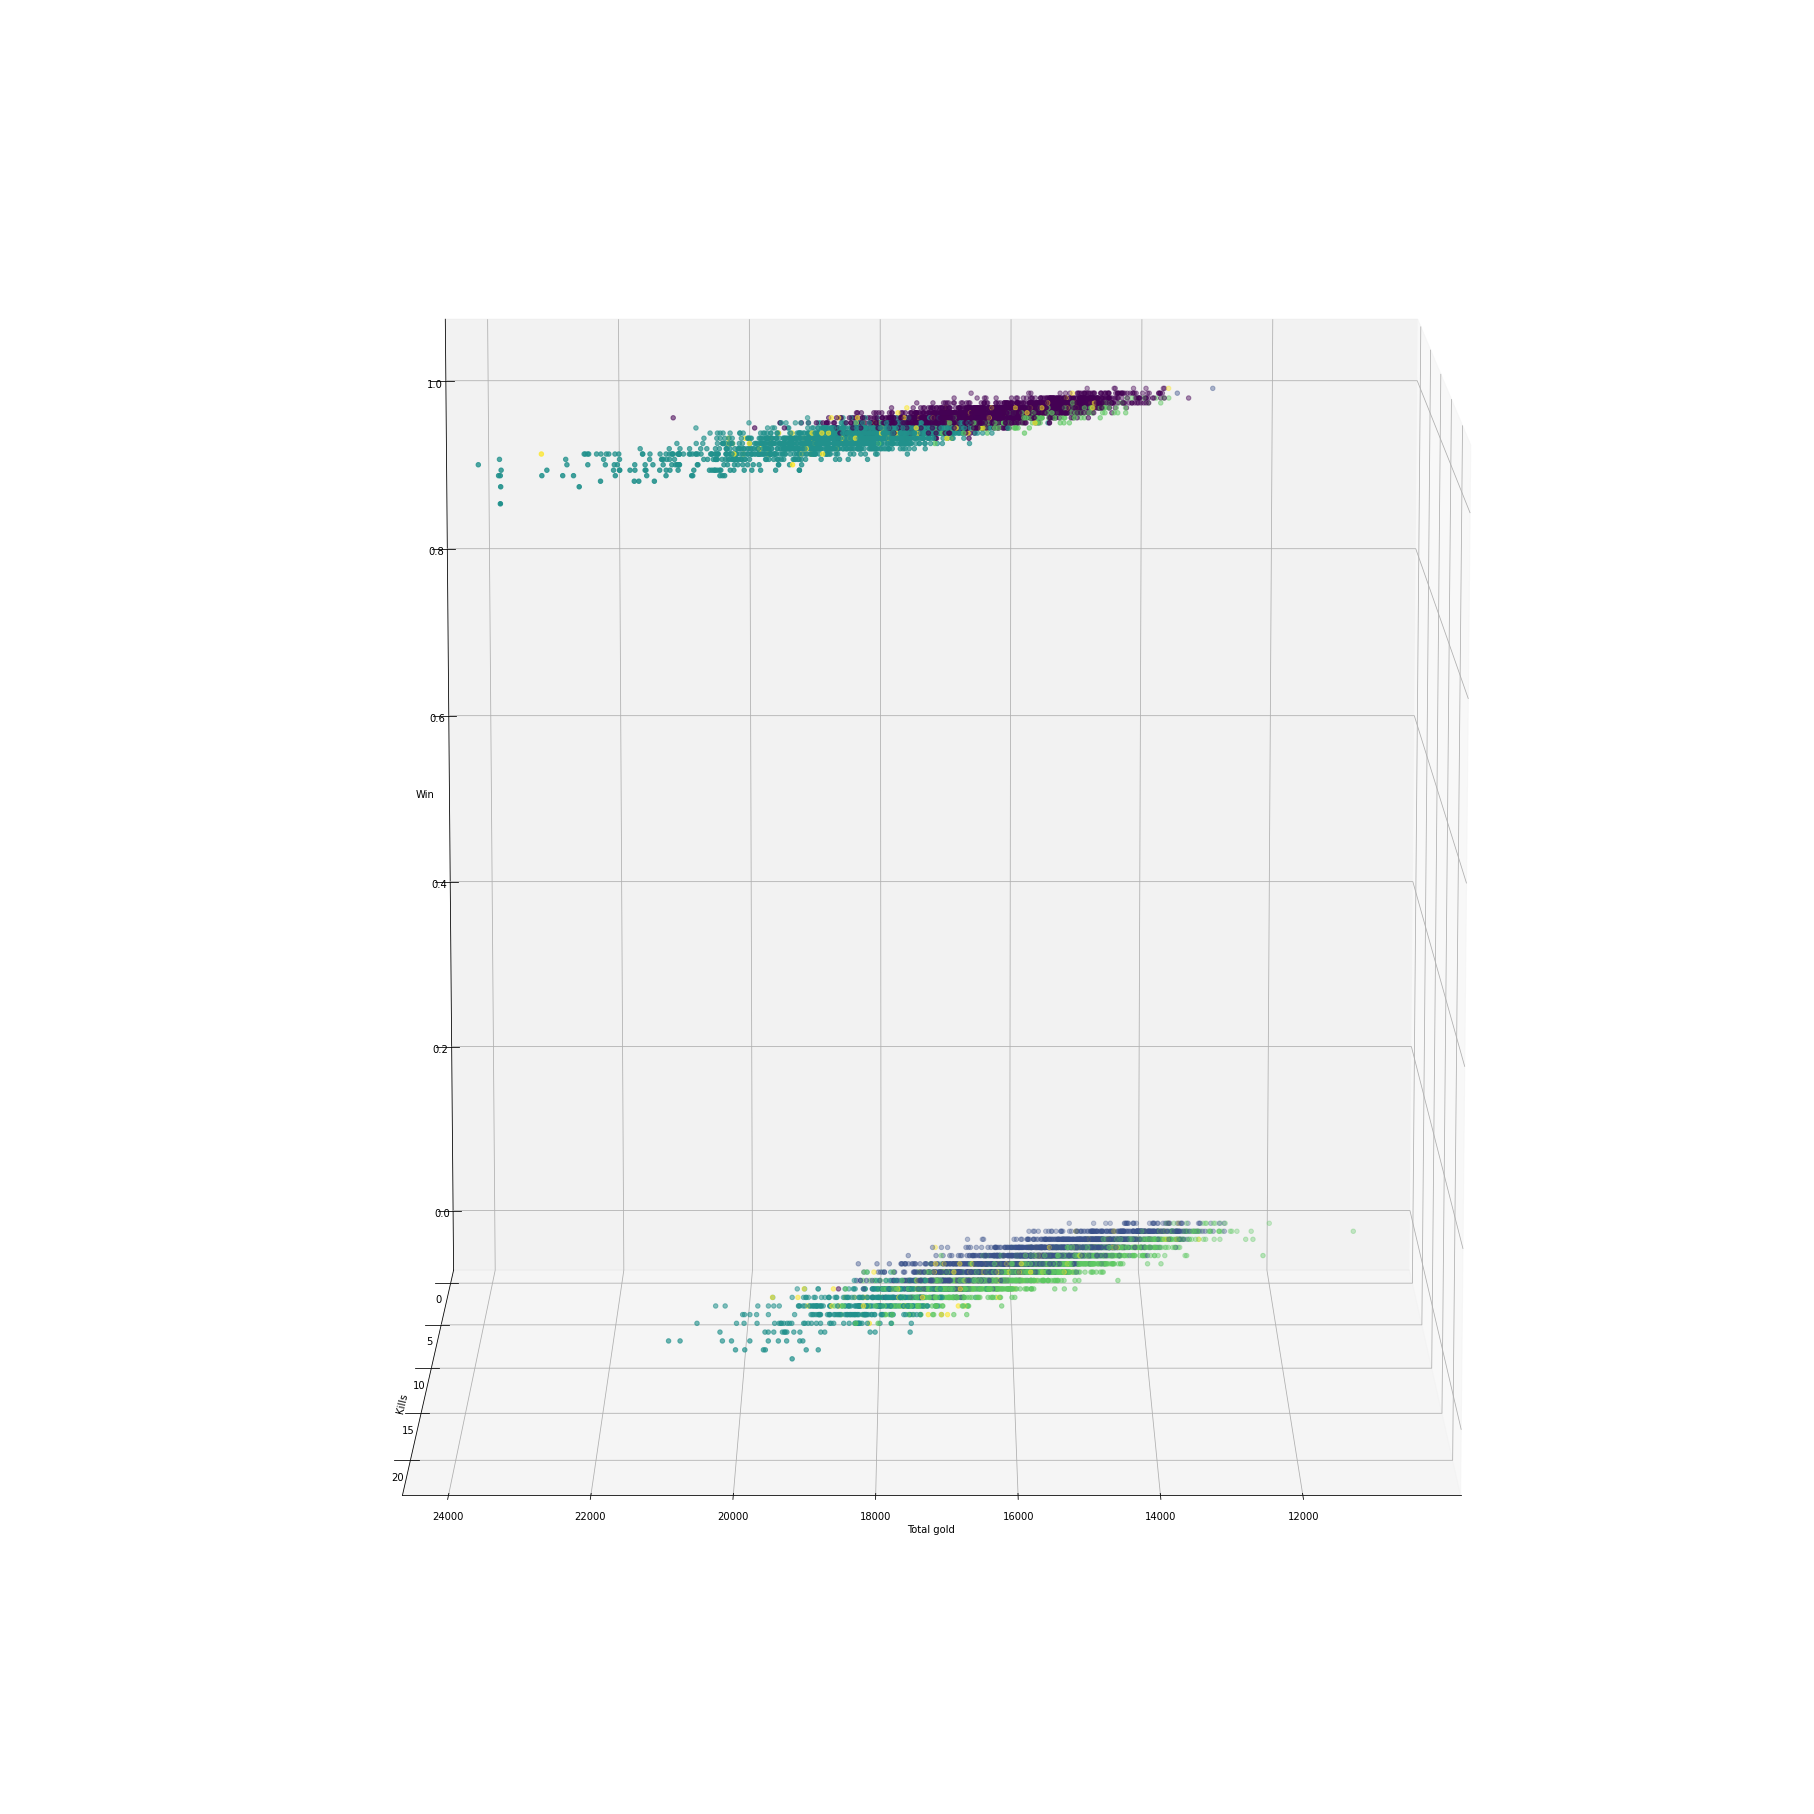

In [410]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=km.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

In [411]:
km = KMeans(n_clusters=6)
km.fit(rankeds_standarized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [412]:
pd.DataFrame(scaler.inverse_transform(km.cluster_centers_), columns=rankeds_standarized.columns)

,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalMinionsKilled
0,-1.781908e-14,19.745680,3.717063,5.111771,3.727322,15514.495140,226.743521
1,8.354271e-02,19.760678,7.859296,7.847990,8.917714,17060.964196,207.944724
2,1.097482e-01,18.765655,3.976759,9.370562,3.825694,14876.173015,193.233699
3,1.000000e+00,19.770548,5.259893,4.487062,5.248097,16319.344368,226.190639
4,4.686567e-01,97.976119,6.325373,6.379104,6.644776,16622.441791,214.283582
5,9.578783e-01,19.922517,10.188768,5.319293,11.754030,18536.032241,220.626625


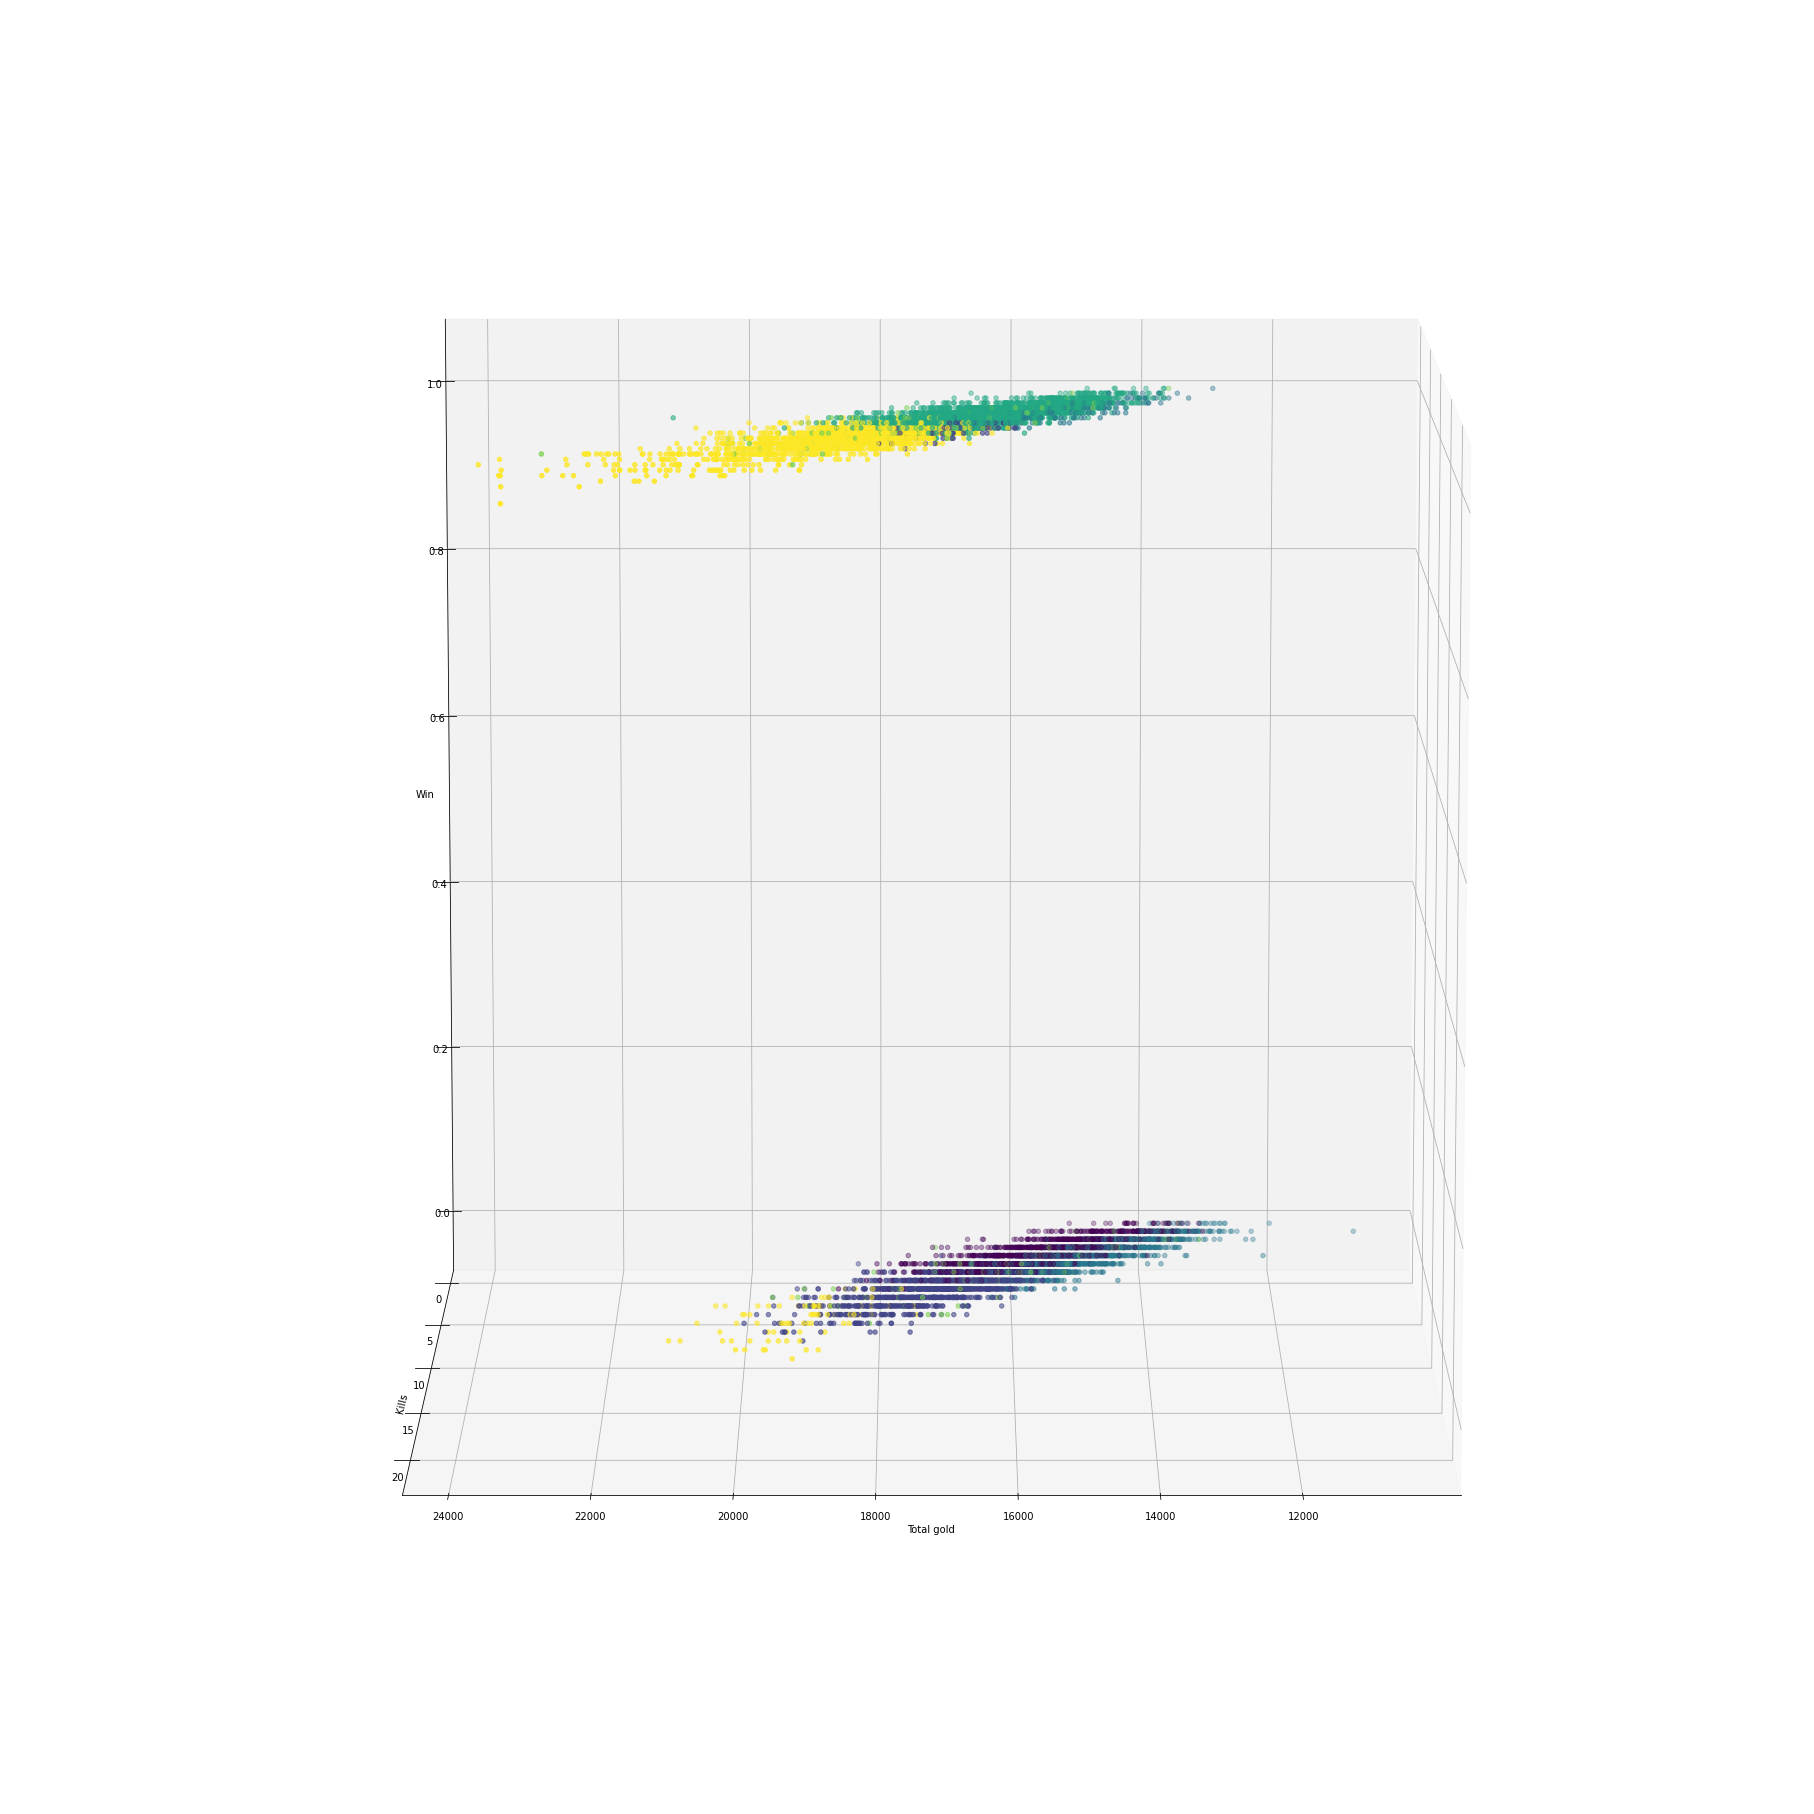

In [413]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(25,25))
ax = Axes3D(fig)
ax.scatter(rankeds['blueTotalGold'], rankeds['blueKills'], rankeds['blueWins'], c=km.labels_)
ax.set_xlabel('Total gold')
ax.set_ylabel('Kills')
ax.set_zlabel('Win')
ax.view_init(10, 90)
plt.show()

### Metoda aglomeracyjna

In [193]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
linkage_matrix = linkage(rankeds, 'ward')

In [194]:
linkage_matrix

array([[4.87000000e+03, 8.71200000e+03, 1.41421356e+00, 2.00000000e+00],
       [2.47900000e+03, 7.63700000e+03, 1.41421356e+00, 2.00000000e+00],
       [2.16300000e+03, 6.25800000e+03, 1.73205081e+00, 2.00000000e+00],
       ...,
       [1.97490000e+04, 1.97520000e+04, 6.08468090e+04, 4.73000000e+03],
       [1.97510000e+04, 1.97530000e+04, 8.55839539e+04, 5.14900000e+03],
       [1.97540000e+04, 1.97550000e+04, 1.69753877e+05, 9.87900000e+03]])

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [32.5, 32.5, 62.5, 62.5],
  [10.0, 10.0, 47.5, 47.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [85.0, 85.0, 110.0, 110.0],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [160.0, 160.0, 182.5, 182.5],
  [140.0, 140.0, 171.25, 171.25],
  [97.5, 97.5, 155.625, 155.625],
  [28.75, 28.75, 126.5625, 126.5625],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [240.0, 240.0, 274.375, 274.375],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [355.0, 355.0, 365.0, 365.0],
  [375.0, 375.0,

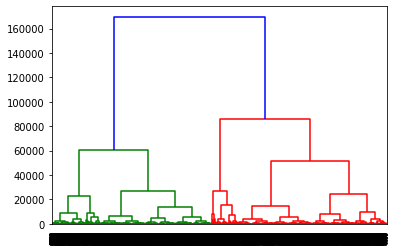

In [197]:
plt.figure(figsize=(15,15))
dendrogram(linkage_matrix)

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [135.0, 135.0, 145.0, 145.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [305.0, 305.0, 322.5, 322.5],
  [295.0, 295.0, 313.75, 313.75],
  [280.0, 280.0, 304.375, 304.375],
  [260.0, 260.0, 292.1875, 292.1875],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 375.0, 385.0, 385.0],
  [365.0, 365.0, 380.0, 380.0],
  [350.0, 350.0, 372.5, 372.5],
  [276.09375, 276.09375, 361.25, 361.25],
  [415.0, 415.0, 425.0, 425.0],
  [405.0, 405.0, 420.0, 420.0],
  [395.0, 395.0, 412.5, 412.5],
  [318.671875, 318.671875, 403.75, 403.75],
  [245.0, 245.0, 361.2109375, 361.2109375],
  [435.0, 435.0, 445.0, 445.0],
  [475.0, 475.0, 485.0, 485.0],
  [495.0, 495.0, 505.0, 505.0],
  [565.0, 565.0, 575.0, 575.0],
  [555.0, 555.0, 570.0, 570.0],
  [585.0, 585.0, 595.0, 595.0],
  [685.0, 685.0, 695.0, 695.0],
  [745.0, 745.0, 755.0, 

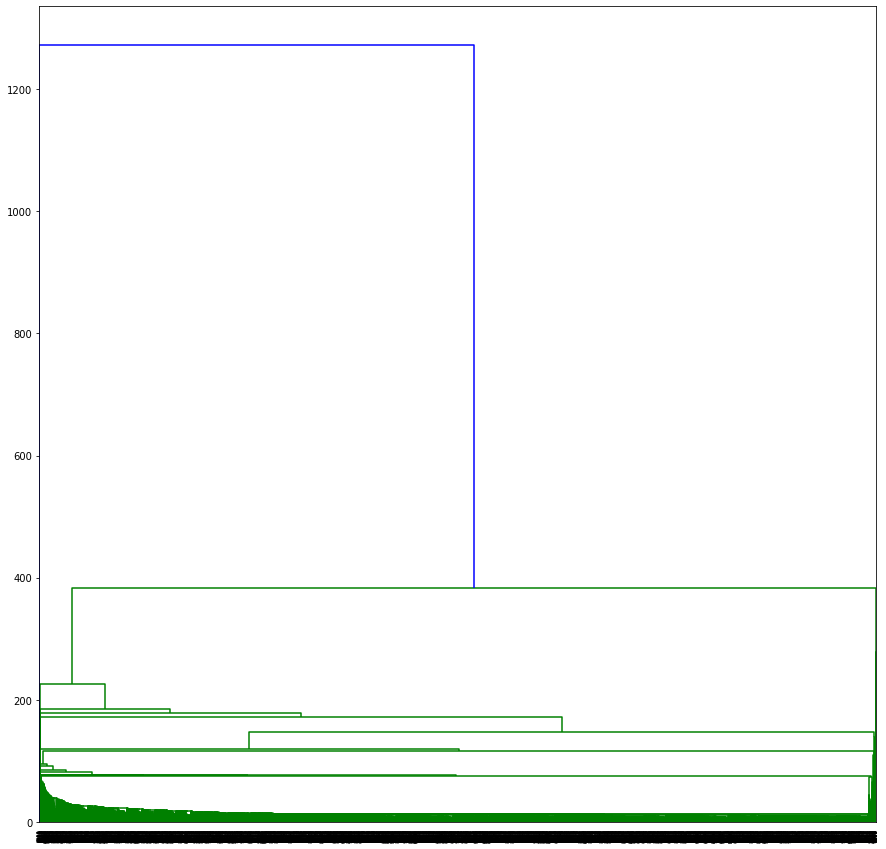

In [201]:
linkage_matrix_complete = linkage(rankeds, 'single')
plt.figure(figsize=(15,15))
dendrogram(linkage_matrix_complete)

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [25.0, 25.0, 43.75, 43.75],
  [15.0, 15.0, 34.375, 34.375],
  [5.0, 5.0, 24.6875, 24.6875],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [150.0, 150.0, 173.75, 173.75],
  [135.0, 135.0, 161.875, 161.875],
  [112.5, 112.5, 148.4375, 148.4375],
  [82.5, 82.5, 130.46875, 130.46875],
  [14.84375, 14.84375, 106.484375, 106.484375],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [235.0, 235.0, 254.375, 254.375],
  [212.5, 212.5, 244.6875, 244.6875],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [302

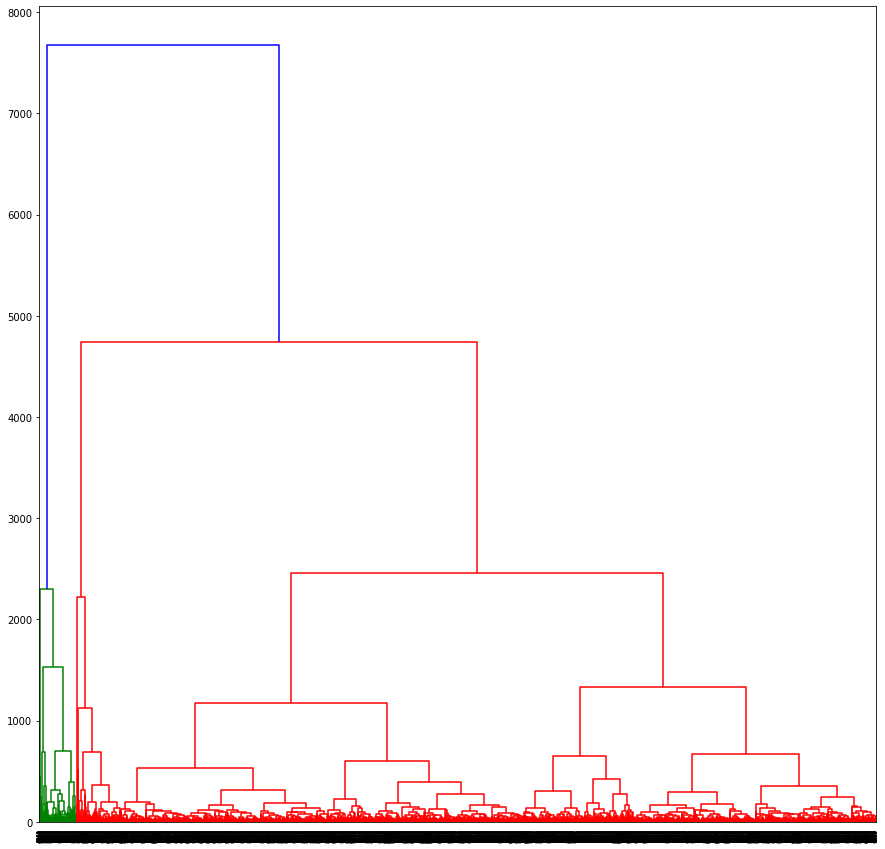

In [203]:
linkage_matrix_average = linkage(rankeds, 'weighted')
plt.figure(figsize=(15,15))
dendrogram(linkage_matrix_average)


In [212]:
methods = ['ward', 'single', 'weighted']
scores = []
for method in ['ward', 'single', 'weighted']:
    linkage_matrix = linkage(rankeds_standarized, method)
    predictions = fcluster(linkage_matrix, t=3, criterion='maxclust')
    score = silhouette_score(rankeds_standarized, predictions)
    scores.append(score)
    print('Method: {} score: {}'.format(method, score))



Method: ward score: 0.18158776969974919
Method: single score: 0.7085348622461028
Method: weighted score: 0.13277360890315704


<BarContainer object of 3 artists>

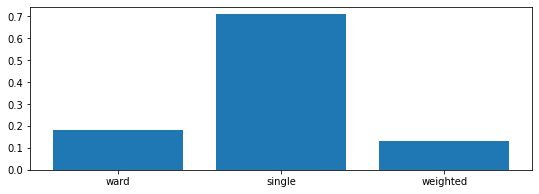

In [373]:
plt.figure(figsize=(9,3))
plt.bar(methods,scores)

### Grupowanie k-modes

In [414]:
rankeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 7 columns):
blueWins                  9879 non-null int64
blueWardsPlaced           9879 non-null int64
blueKills                 9879 non-null int64
blueDeaths                9879 non-null int64
blueAssists               9879 non-null int64
blueTotalGold             9879 non-null int64
blueTotalMinionsKilled    9879 non-null int64
dtypes: int64(7)
memory usage: 540.4 KB


In [415]:
rankeds['blueTotalGold'].max()


23701

In [416]:
pd.cut(rankeds['blueTotalGold'], [0, 5000, 10000, 15000, 20000, 25000])

0       (15000, 20000]
1       (10000, 15000]
2       (15000, 20000]
3       (15000, 20000]
4       (15000, 20000]
             ...      
9874    (15000, 20000]
9875    (15000, 20000]
9876    (15000, 20000]
9877    (10000, 15000]
9878    (15000, 20000]
Name: blueTotalGold, Length: 9879, dtype: category
Categories (5, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000]]

In [417]:
rankeds['blueTotalGoldCategorized'] = pd.cut(rankeds['blueTotalGold'], [0,5000,10000,15000,20000,25000])
rankeds['blueTotalGoldCategorized']

0       (15000, 20000]
1       (10000, 15000]
2       (15000, 20000]
3       (15000, 20000]
4       (15000, 20000]
             ...      
9874    (15000, 20000]
9875    (15000, 20000]
9876    (15000, 20000]
9877    (10000, 15000]
9878    (15000, 20000]
Name: blueTotalGoldCategorized, Length: 9879, dtype: category
Categories (5, interval[int64]): [(0, 5000] < (5000, 10000] < (10000, 15000] < (15000, 20000] < (20000, 25000]]

In [418]:
rankeds_cat = rankeds[['blueTotalGoldCategorized', 'blueWins', 'blueWardsPlaced', 'blueKills', 'blueDeaths', 'blueAssists', 'blueTotalMinionsKilled']]

In [419]:
rankeds_cat['blueTotalGoldCategorized'].describe()

count               9879
unique                 3
top       (15000, 20000]
freq                8078
Name: blueTotalGoldCategorized, dtype: object

In [420]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
rankeds_processed = rankeds_cat.apply(le.fit_transform)

In [421]:
rankeds_processed

,blueTotalGoldCategorized,blueWins,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueTotalMinionsKilled
0,1,0,22,9,6,11,63
1,0,0,6,5,5,5,42
2,1,0,9,7,11,4,54
3,1,0,37,4,5,5,69
4,1,0,69,6,6,6,78
...,...,...,...,...,...,...,...
9874,1,1,11,7,4,5,79
9875,1,1,48,6,4,8,101
9876,1,0,17,6,7,5,78
9877,0,0,8,2,3,3,92


In [422]:
from kmodes.kmodes import KModes

In [423]:
km = KModes(n_clusters=2, init = "Huang", n_init = 5, verbose=1)
fitClusters_cao = km.fit_predict(rankeds_processed)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 854, cost: 45549.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 849, cost: 45809.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 1187, cost: 45713.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1040, cost: 46853.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 944, cost: 45499.0
Best run was number 5


In [424]:
km.cluster_centroids_

array([[ 1,  0, 10,  4,  7,  4, 88],
       [ 1,  1,  8,  6,  4,  6, 94]], dtype=int64)

### DBSCAN

In [425]:
rankeds_refresh = rankeds.drop('blueTotalGoldCategorized', axis=1)
rankeds_refresh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 7 columns):
blueWins                  9879 non-null int64
blueWardsPlaced           9879 non-null int64
blueKills                 9879 non-null int64
blueDeaths                9879 non-null int64
blueAssists               9879 non-null int64
blueTotalGold             9879 non-null int64
blueTotalMinionsKilled    9879 non-null int64
dtypes: int64(7)
memory usage: 540.4 KB


In [426]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [427]:
scaler = StandardScaler()
rankeds_refresh[rankeds_refresh.columns] = scaler.fit_transform(rankeds_refresh)
clusters = DBSCAN(eps=20, min_samples=5).fit_predict(rankeds_refresh[rankeds_refresh.columns])

In [428]:
clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

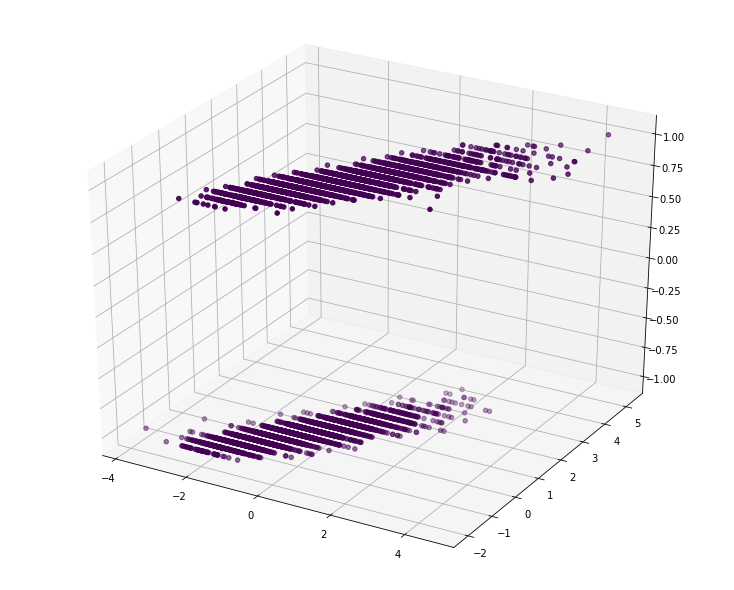

In [429]:
fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

ax.scatter(
    rankeds_refresh['blueTotalGold'], rankeds_refresh['blueKills'], rankeds_refresh['blueWins'],
    c=clusters
)
plt.show()